This notebook is used to test the system simulator.

# Import libraries

In [1]:
from regelum.scenario import Scenario
from regelum.objective import RunningObjective
# from regelum.simulator import SciPy
import numpy as np
from tqdm.notebook import tqdm

import sys
sys.path.append('../')

from src.system import HydraulicSystemNumpy
from src.policy import PDController
from src.simulator import SciPy
from src.objective import HydraulicObjectiveModel

In [2]:
from regelum.callback import (
    ScenarioStepLogger,
    # HistoricalDataCallback,
)
from src.callback import HistoricalDataCallback

from regelum import set_ipython_env
%matplotlib inline
callbacks = [ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

In [3]:
max_step = 1e-6
sampling_time = 1e-3 # 1e-3
final_time = 10e-3 # 10e-3

# Define the initial state (initial position of the kinematic point).
p_atm = 1e5
initial_state = np.array([1e3, 0, 0, p_atm, p_atm])

# Initialize the kinematic point system.
system = HydraulicSystemNumpy(
    init_state=initial_state
)

# Instantiate a simulator for the hydraulic system
simulator = SciPy(
    system=system, 
    state_init=initial_state, 
    time_final=final_time, 
    max_step=max_step,
    rtol=1e-1,
    atol=5e-4,
)

pd_policy = PDController(
    system=system,
    sampling_time=sampling_time,
)

# RUNNING OBJECTIVE
running_objective_model = HydraulicObjectiveModel(
    system=system,
    quad_matrix_type="diagonal", weights=[1, 0, 0]
)  # A quadratic model for running (a.k.a. instant) objective. We 
running_objective = RunningObjective(
    model=running_objective_model
)  # Wrap `running_objective_model` into `RunningObjective` class


scenario = Scenario(
    policy=PDController(
        system=system,
        sampling_time=sampling_time
    ),
    simulator=simulator,
    sampling_time=sampling_time,
    running_objective=running_objective,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()

[11:32:02] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=115858;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=586493;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                        

           INFO     runn. objective: 2.92, state est.: [  0.22 432.72], observation: [  0.22       ]8;id=451005;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=402372;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    432.72], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode: 1/1,                     
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 1.28, state est.: [  0.79 694.4 ], observation: [  0.79 694.4 ]8;id=64610;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=218954;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [14.66], value: 0.0079, time: 0.0020 (20.0%), episode: 1/1,                         
                    iteration: 1/1                                                                                 

[11:32:03] INFO     runn. objective: 0.17, state est.: [  1.51 738.31], observation: [  1.51       ]8;id=821808;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=664523;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    738.31], action: [5.29], value: 0.0081, time: 0.0030 (30.0%), episode: 1/1,                    
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.05, state est.: [  2.16 563.24], observation: [  2.16       ]8;id=217814;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=198246;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    563.24], action: [-3.11], value: 0.0081, time: 0.0040 (40.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.40, state est.: [  2.56 274.7 ], observation: [  2.56 274.7 ]8;id=233661;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=266753;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [-8.42], value: 0.0085, time: 0.0050 (50.0%), episode: 1/1,                         
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.59, state est.: [2.7  9.12], observation: [2.7  9.12],      ]8;id=170112;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=69738;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-10.15], value: 0.0091, time: 0.0060 (60.0%), episode: 1/1,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.60, state est.: [  2.7  -23.71], observation: [  2.7        ]8;id=783674;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=532826;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -23.71], action: [-10.2], value: 0.0097, time: 0.0070 (70.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[11:32:04] INFO     runn. objective: 0.60, state est.: [  2.7  -23.71], observation: [  2.7        ]8;id=93673;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=453131;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -23.71], action: [-10.2], value: 0.0103, time: 0.0080 (80.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.60, state est.: [  2.7  -23.71], observation: [  2.7        ]8;id=801048;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=860420;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -23.71], action: [-10.2], value: 0.0109, time: 0.0090 (90.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001001,2.917170,0.006628,1,1,20.000000,0.218330,432.722186
2,0.002001,1.284803,0.007913,1,1,14.659264,0.792812,694.395731
3,0.003001,0.172294,0.008085,1,1,5.288976,1.511220,738.305692
4,0.004001,0.052395,0.008137,1,1,-3.110572,2.155203,563.243783
5,0.005001,0.404820,0.008542,1,1,-8.423746,2.562558,274.698520
6,0.006001,0.591044,0.009133,1,1,-10.152469,2.695097,9.124258
7,0.007001,0.596077,0.009729,1,1,-10.195070,2.698363,-23.705211
8,0.008001,0.596079,0.010325,1,1,-10.195092,2.698365,-23.705211
9,0.009001,0.596082,0.010921,1,1,-10.195115,2.698366,-23.705211


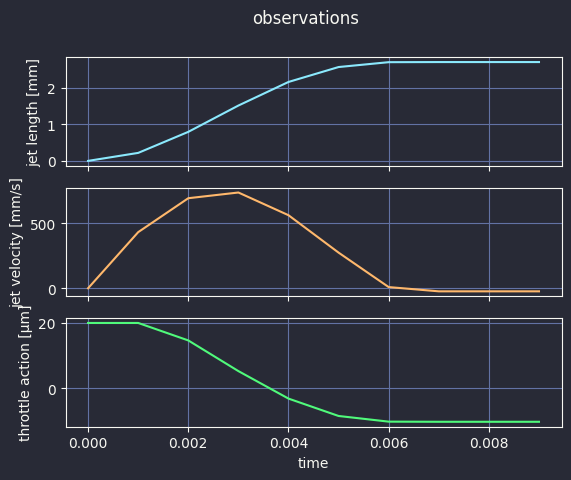

In [4]:
display(callbacks[-1].data.iloc[:,:-2])
callbacks[1].plot(name="observations");